## Übung zu Kapitel 10

In dieser Übung wollen wir das Text Mining mit einem größeren Beispiel vertiefen. Hierzu verwenden wir eine Erweiterung der oben genannten Tweets: Statt nur acht Tweets betrachten wir den vollständigen Korpus der [Tweets von Donald Trump aus dem Jahr 2017](https://data-science-crashkurs.de/exercises/data/trump-tweets-2017.txt). 

### Wortwolke ohne Preprocessing

Laden Sie die Daten. Erstellen Sie eine Wortwolke ohne jegliches Preprocessing. Welche Probleme gibt es? Was erkennt man eventuell trotzdem bereits?

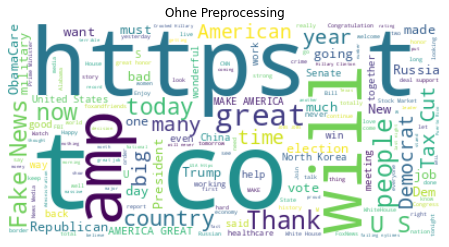

In [7]:
import re
import urllib.request
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

with open('data/trump-tweets-2017.txt') as f:
    corpus = []
    for line in f:
        corpus.append(line)

        
wc_raw = WordCloud(background_color="white")
wc_raw.generate(' '.join(corpus))

plt.figure(figsize=(12,4))
plt.axis('off')
plt.imshow(wc_raw, interpolation="bilinear")
plt.title('Ohne Preprocessing')
plt.show()

Während man bereits einige wichtige Wörter ausmachen kann, wie zum Beispiel "Fake News" und "Tax Cut", wird die Wortwolke von Artefakten wie zum Beispiel "https" von Links, "co" vom Linkverkürzer, oder "amp" von der HTML Entität für das Kaufmannsund (&). 

### Wortwolke mit Preprocessing

Wenden Sie die Preprocessing-Schritte, die wir diskutiert haben, an und erstellen Sie eine neue Wortwolke.

Wir entfernen jetzt Links, das Kaufmannsund, Zeichensetzung, ersetzen US durch USA um die Verwechslung mit "us" zu vermeiden und wandeln die Daten in Kleinbuchstaben um. Anschließend entfernen wir die Stoppwörter, alle Wörter die nicht-ASCII-Zeichen enthalten, und wir verwenden Lemmatisierung. Wir verzichten auf Stemming, da wir dann möglichweise nur Wortstämme, nicht jedoch echte Wörter, in der Wortwolke hätten. 

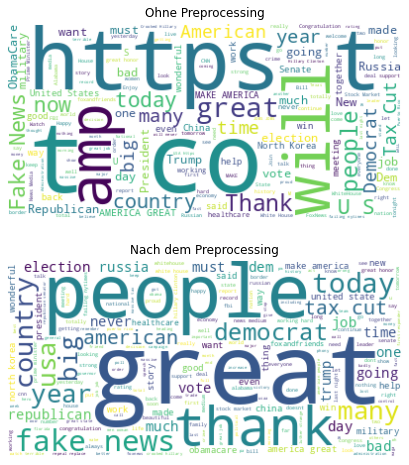

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

processed_corpus = []
for tweet in corpus:
    # remove links
    modified_tweet = re.sub(r'http\S+', '', tweet).strip()
    # remove &amp; (html entity for &)
    modified_tweet = modified_tweet.replace('&amp;', '')
    # remove punctuation
    modified_tweet = modified_tweet.translate(str.maketrans('', '', string.punctuation))
    # replace US with USA
    modified_tweet = modified_tweet.replace('US', 'usa')
    # lower case
    modified_tweet = modified_tweet.lower()

    # now we tokenize, because the following operations work on the word-level
    words = word_tokenize(modified_tweet)
    modified_tweet = ' '.join([lemmatizer.lemmatize(w)
                               for w in words if w.isalpha() and w not in stop_words])
    processed_corpus.append(modified_tweet)

wc_processed = WordCloud(background_color="white")
wc_processed.generate(' '.join(processed_corpus))

fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].axis('off')
axes[0].imshow(wc_raw, interpolation="bilinear")
axes[0].set_title('Ohne Preprocessing')
axes[1].axis('off')
axes[1].imshow(wc_processed, interpolation="bilinear")
axes[1].set_title('Nach dem Preprocessing')
plt.show()

Durch die Bereinigung der Daten sieht man die Themen jetzt deutlich: Es geht um großartiges (great), man dankt jemanden (thank), es geht um andere Menschen (people). Auch politische Themen aus dem Jahr 2017 tauchen regelmäßig auf, zum Beispiel eine große Steuersenkung (tax cut), der konstante Angriff auf die Medien (fake news), sowie Angriffe auf Wahlen (election) durch Russland (russia). 

### TF-IDF

Die Wortwolken benutzen üblicherweise die Worthäufigkeiten. Berechnen Sie die TF-IDF und erstellen Sie neue Wortwolken basierend auf den auf diese Art gewichteten Worthäufigkeiten. Wie verändert sich das Ergebnis?

Zuerst erstellen wir mit TFIDF eine neue Wortwolke. 

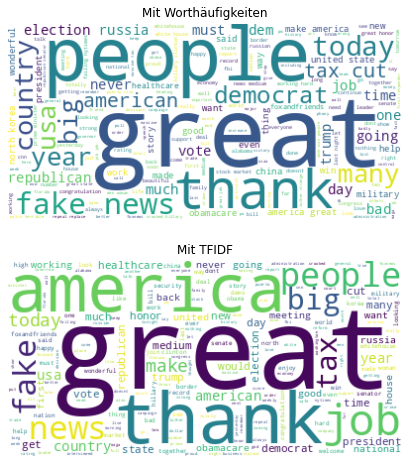

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_corpus)

frequencies = pd.DataFrame(
    data=X.toarray(), columns=vectorizer.get_feature_names()).sum().to_dict()

wc_tfidf = WordCloud(background_color="white")
wc_tfidf.generate_from_frequencies(frequencies)

fig, axes = plt.subplots(2, 1, figsize=(12,8))
axes[0].axis('off')
axes[0].imshow(wc_processed, interpolation="bilinear")
axes[0].set_title('Mit Worthäufigkeiten')
axes[1].axis('off')
axes[1].imshow(wc_tfidf, interpolation="bilinear")
axes[1].set_title('Mit TFIDF')
plt.show()

Wenn man die beiden Wortwolken vergleicht sieht man das einige Begriff hochskaliert wurden (america, great, job), andere Begriffe scheinen weniger Wichtig (people, fake, news, country). Insgesamt sind die Unterschiede aber überschaubar. 